In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Imron\\Project ML\\bank-additional-full.csv')
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [11]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Imron\\Project ML\\bank-additional-full.csv', sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

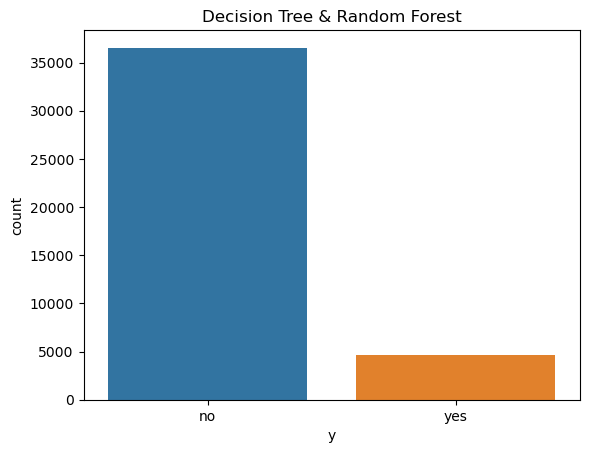

In [12]:
# Structure
df.info()

# Statistics
df.describe()

# Пропущені значення
df.isnull().sum()

# Missing values
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='y')
plt.title("Decision Tree & Random Forest")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

# Coding the target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Encoding categorical features
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separation
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

scores = cross_val_score(tree_model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average value:", scores.mean())

Cross-validation scores: [0.88856519 0.35457635 0.8487497  0.2091781  0.14277043]
Average value: 0.4887679521370466


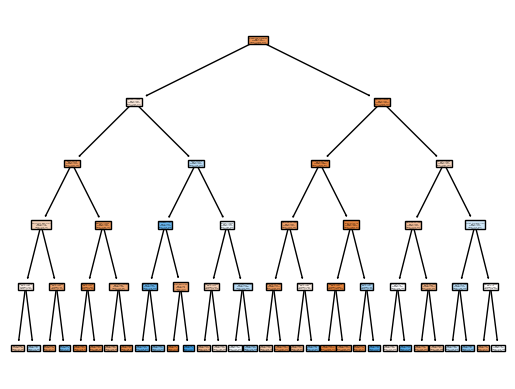

In [16]:
plot_tree(tree_model,
          filled=True,
          feature_names=X.columns.tolist(),  
          class_names=['no', 'yes'])
plt.show()

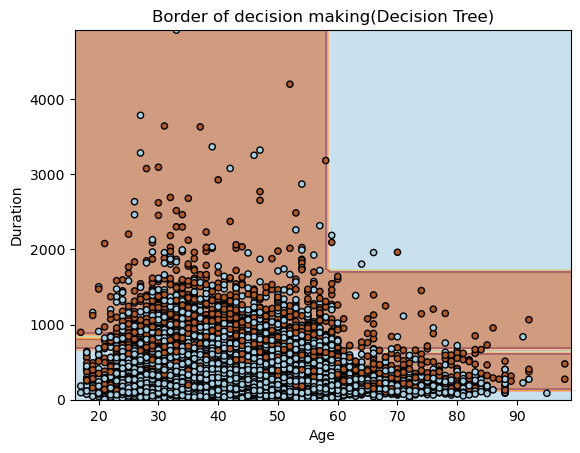

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# We choose two features
X2 = X_train[['age', 'duration']]
y2 = y_train

# We are training the decision tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X2, y2)

# We are creating an object to build the boundary.
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X2,
    response_method="predict",
    cmap=plt.cm.Paired,
    alpha=0.6
)

# We add points from the training sample.
scatter = plt.scatter(X2['age'], X2['duration'], c=y2, cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.xlabel("Age")
plt.ylabel("Duration")
plt.title("Border of decision making(Decision Tree)")
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
rf_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation (Random Forest):", rf_scores)
print("Average value:", rf_scores.mean())

Cross-validation (Random Forest): [0.88832241 0.36392328 0.61240592 0.14956902 0.14216341]
Average value: 0.43127680826479375


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)

print("The best parameters:", grid.best_params_)
print("Model accuracy:", grid.best_score_)

The best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Model accuracy: 0.9141730840863178
